In [68]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
x = np.array(range(1,101))
y = np.random.randint(1,101,100)

In [69]:
df = pd.DataFrame(list(zip(x , y)) , columns = ['x' , 'y'])

In [91]:
centroid = df.sample(2).reset_index(drop= True)


centroid_hold = centroid.copy()

In [88]:
ctr1 = 101
ctr2 = 201
g = 1
while True:
    dist1 = np.sqrt(np.power(df.x - centroid.x[0],2) + np.power(df.y - centroid.y[0],2) )
    dist2 = np.sqrt(np.power(df.x - centroid.x[1],2) + np.power(df.y - centroid.y[1],2) )
    
    d1 = 'd' + str(ctr1)
    d2 = 'd' + str(ctr2)
    grp = 'grp' + str(g)

    df[d1] = dist1
    df[d2] = dist2
    df[grp] = np.where (df[d1] <= df[d2] , 1,2)
    ctr1 = ctr1+1
    ctr2 = ctr2+1
    g = g+ 1
    centroid = df.groupby(grp)[['x', 'y']].mean().reset_index(drop= True)

    if centroid.equals(centroid_hold) :
        break
    centroid_hold = centroid.copy()    


   

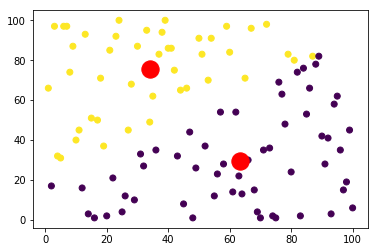

           x          y
0  63.285714  29.678571
1  34.227273  75.727273


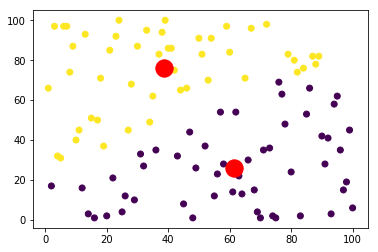

           x       y
0  61.557692  26.000
1  38.520833  75.875


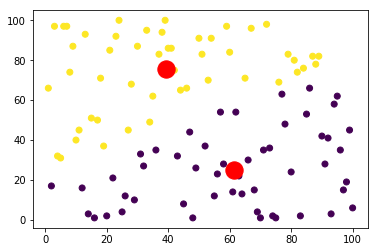

           x          y
0  61.274510  25.156863
1  39.285714  75.734694


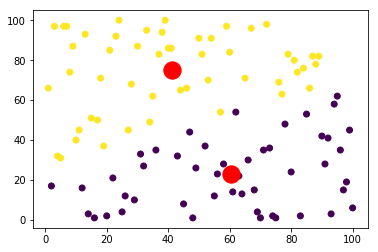

           x          y
0  60.520833  22.916667
1  41.250000  74.884615


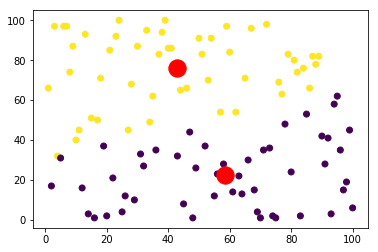

           x          y
0  58.510204  22.734694
1  42.803922  76.078431


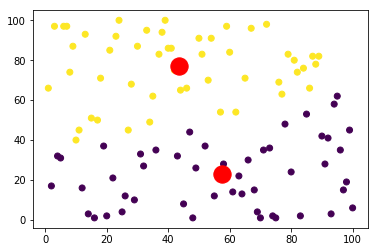

       x      y
0  57.42  22.92
1  43.58  76.96


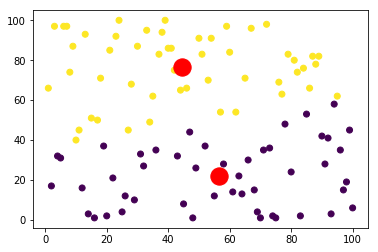

           x          y
0  56.653061  22.122449
1  44.588235  76.666667


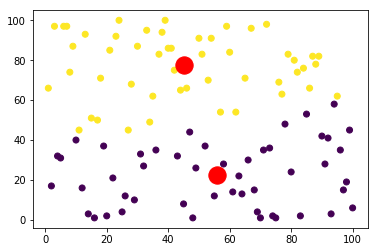

       x      y
0  55.72  22.48
1  45.28  77.40


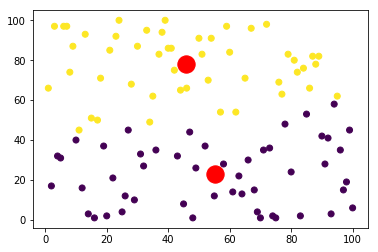

           x          y
0  55.156863  22.921569
1  45.653061  78.061224


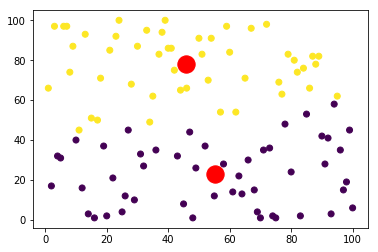

           x          y
0  55.156863  22.921569
1  45.653061  78.061224


In [89]:
grps = int((len(df.columns)-2)/3)
for i in range(1, grps+1) :
    plt.scatter(df.x, df.y, c=df['grp'+str(i)] )
    centroid = df.groupby(df['grp'+str(i)])[['x', 'y']].mean().reset_index(drop=True)
    plt.scatter(centroid.x, centroid.y, c='r', s=300)
    plt.show()
    print(centroid)


In [90]:
df

,x,y,d1,d2,d101,d201,grp1,d102,d202,grp2,...,grp7,d108,d208,grp8,d109,d209,grp9,d110,d210,grp10
0,1,66,44.598206,22.627417,71.852778,32.279428,2,72.102402,34.621835,2,...,2,70.869618,44.874403,2,69.916156,45.723937,2,69.200557,46.253314,2
1,2,17,33.120990,36.249138,63.661234,65.657550,1,62.583424,66.988728,1,...,1,54.892591,73.306677,1,53.998785,74.305574,1,53.485671,75.060395,1
2,3,97,69.856997,49.040799,89.543445,36.000126,2,90.368922,37.784540,2,...,2,92.115681,46.292826,2,91.283234,46.602129,2,90.597750,46.668628,2
3,4,32,27.018512,22.203603,60.002537,51.635255,2,59.331147,53.157901,2,...,1,53.571549,60.353260,1,52.588866,61.361213,1,51.956160,62.101642,1
4,5,31,26.076810,22.472205,59.001703,51.956113,2,58.300692,53.429977,2,...,1,52.410396,60.437346,1,51.430621,61.444596,1,50.803267,62.188666,1
5,6,97,68.709534,48.270074,87.527302,33.643219,2,88.395859,35.345549,2,...,2,90.401218,43.617615,2,89.584088,43.898501,2,88.904506,43.943628,2
6,7,97,68.352030,48.052055,86.867880,32.880875,2,87.751105,34.552182,2,...,2,89.844722,42.735464,2,89.032965,43.006027,2,88.355517,43.043424,2
7,8,74,47.010637,25.632011,70.332419,23.902770,2,70.858304,26.284088,2,...,2,71.122434,36.685284,2,70.224702,37.434722,2,69.518169,37.871448,2
8,9,87,58.309519,37.854986,78.172847,25.597796,2,78.947356,27.631317,2,...,2,80.497894,37.058066,2,79.659204,37.528634,2,78.971522,37.727293,2
9,10,40,22.135944,12.206556,54.672955,41.668871,2,54.276139,43.167103,2,...,2,49.961134,50.406254,1,48.961912,51.414379,1,48.278516,52.151679,1
